In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Загрузка данных
data = {
    "name": ["Алиса и Алисия: Кир Булычев"],
    "rating": [581],
    "annotation": [
        "В повести 'Алиса и Алисия' главные герои попадают в мир, который легко можно принять за их собственное будущее. Но ведь никогда, путешествуя по времени, нельзя забегать вперед. "
        "В сборник также вошли повести 'Сапфировый венец', 'Заколдованный король', 'Уроды и красавцы'. На страницах книги смелая Алиса спасает двоих детей в далеком прошлом и целую королевскую семью в настоящем, борется с несправедливостью и вместе с друзьями защищает слабых не только на Земле, но и по всей Галактике. "
        "Для детей 11-14 лет."
    ],
    "price": [581]
}
df = pd.DataFrame(data)

# Преобразование текстов в числовые векторы
vectorizer = TfidfVectorizer(max_features=1000)  # Ограничим количество признаков до 1000
X = vectorizer.fit_transform(df['annotation'])

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Вычисление инерции для разных значений k
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Построение графика метода локтя
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

ValueError: n_samples=1 should be >= n_clusters=2.

In [36]:
!pip install --upgrade numpy spacy

In [44]:
!pip install punkt_tab

ERROR: Could not find a version that satisfies the requirement punkt_tab (from versions: none)
ERROR: No matching distribution found for punkt_tab


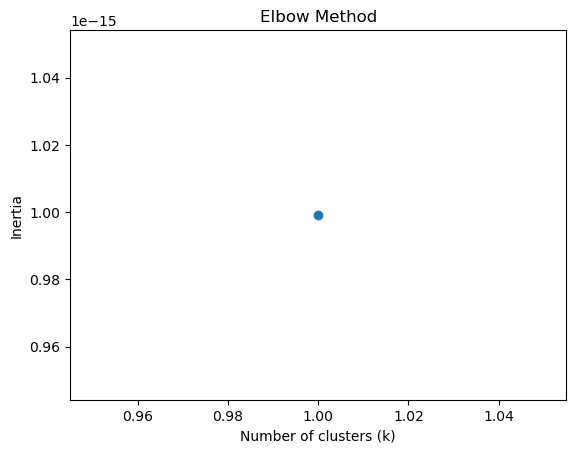


Результаты кластеризации:
                          name  cluster
0  Алиса и Алисия: Кир Булычев        0
 
Итоговый DataFrame: (1, 3)

Результаты кластеризации:
                           name  cluster
0  Алиса и Алисия: Кир Булычев        0

Тематическое разбиение текстов (LDA):
Topic #0:
алиса будущее время герои мир путешествуя земля галактика дети
Topic #1:
вперед король семья слабых друзья справедливость красавцы уроды
Topic #2:
книга аннотация цена название рейтинг

Именованные сущности:
[('Алиса', 'PER'), ('Алисия', 'PER'), ('Сапфировый венец', 'WORK_OF_ART'), ('Заколдованный король', 'WORK_OF_ART')]



In [60]:
# Импорт библиотек
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import spacy

# --------------------
# Часть 1: Подготовка данных
# --------------------

# Исходные данные. Используется часть датасета
data = {
    "name": ["Алиса и Алисия: Кир Булычев"],
    "annotation": [
        "В повести 'Алиса и Алисия' главные герои попадают в мир, который легко можно принять за их собственное будущее. "
        "Но ведь никогда, путешествуя по времени, нельзя забегать вперед. "
        "В сборник также вошли повести 'Сапфировый венец', 'Заколдованный король', 'Уроды и красавцы'. "
        "На страницах книги смелая Алиса спасает двоих детей в далеком прошлом и целую королевскую семью в настоящем, "
        "борется с несправедливостью и вместе с друзьями защищает слабых не только на Земле, но и по всей Галактике. "
        "Для детей 11-14 лет."
    ],
    "price": [581]
}

# Создание DataFrame
df = pd.DataFrame(data)

# Преобразование текстов в числовые векторы
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['annotation'])

# --------------------
# Часть 2: Кластеризация
# --------------------

# Метод локтя для выбора оптимального k
inertia = []
k_values = range(1, min(11, X.shape[0] + 1))  # Ограничение k максимальным значением n_samples
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Построение графика метода локтя
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Выбор оптимального k (например, k=1)
k = min(3, X.shape[0])  # Убедимся, что k <= n_samples
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Вывод результатов кластеризации
print("\nРезультаты кластеризации:")
print(df[['name', 'cluster']])

# --------------------
# Часть 3: Тематическое разбиение текстов
# --------------------

# Тематическое разбиение текстов (LDA)
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Функция для вывода топ-N слов каждой темы
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Вывод топ-10 слов для каждой темы
tfidf_feature_names = vectorizer.get_feature_names_out()
print("\nТематическое разбиение текстов (LDA):")
print_top_words(lda, tfidf_feature_names, 10)

# --------------------
# Часть 4: Выделение именованных сущностей
# --------------------

# Загрузка модели spaCy для русского языка
nlp = spacy.load("ru_core_news_sm")

# Пример текста
text = df['annotation'].iloc[0]

# Обработка текста
doc = nlp(text)

# Выделение именованных сущностей
entities = [(ent.text, ent.label_) for ent in doc.ents]
print("\nИменованные сущности:")
print(entities)